<a href="https://colab.research.google.com/github/datagrad/Kamal-Thesis-Work/blob/main/Decision_Trees_with_SARIMA_Model_AQI_Kamal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:

# Assuming you have your dataset in a CSV file named 'pollutant_data.csv'
url = 'https://raw.githubusercontent.com/datagrad/MS_Reference_MS-DS-LJMU-C13/main/city_day.csv'
df = pd.read_csv(url)

# only keeping data for 'Delhi', 'Bengaluru', 'Patna', 'Ahmedabad', 'Amritsar' Cities
cities_to_keep = ['Delhi', 'Bengaluru', 'Hyderabad']
df = df[df['City'].isin(cities_to_keep)]


# Retain only the desired columns: 'City', 'Date', and 'PM2.5'
df = df[['City', 'Date', 'PM2.5']]

# Remove the 'AQI_Bucket' column
# df.drop(columns=['AQI_Bucket'], inplace=True)

df

,City,Date,PM2.5
1,Bengaluru,1/1/2015,NaN
3,Delhi,1/1/2015,313.22
7,Bengaluru,1/2/2015,NaN
9,Delhi,1/2/2015,186.18
13,Bengaluru,1/3/2015,NaN
...,...,...,...
29489,Delhi,6/30/2020,39.80
29493,Hyderabad,6/30/2020,19.38
29509,Bengaluru,7/1/2020,17.50
29515,Delhi,7/1/2020,54.01


In [3]:
data_types = df.dtypes
print(data_types)


City      object
Date      object
PM2.5    float64
dtype: object


In [4]:
# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Now you can check the data types again to verify the change
data_types = df.dtypes
print(data_types)

City             object
Date     datetime64[ns]
PM2.5           float64
dtype: object


In [5]:
# Find NaN values for each city in the 'PM2.5' column
nan_values_by_city = df[df['PM2.5'].isnull()].groupby('City').size()
print("NaN values for PM2.5 by city:")
print(nan_values_by_city)

NaN values for PM2.5 by city:
City
Bengaluru    146
Delhi          2
Hyderabad    115
dtype: int64


In [6]:
# NAN value imputation


# Replace NaN values in the 'PM2.5' column with next day's value (forward fill) for each city
df['PM2.5'] = df.groupby('City')['PM2.5'].fillna(method='ffill')

In [7]:
# Filter rows with NaN values in the 'PM2.5' column
rows_with_nan_pm25 = df[df['PM2.5'].isnull()]

# Display all the rows with NaN values in the 'PM2.5' column
# print(

rows_with_nan_pm25
    # )

,City,Date,PM2.5
1,Bengaluru,2015-01-01,NaN
7,Bengaluru,2015-01-02,NaN
13,Bengaluru,2015-01-03,NaN
19,Bengaluru,2015-01-04,NaN
22,Hyderabad,2015-01-04,NaN
...,...,...,...
589,Hyderabad,2015-03-26,NaN
596,Hyderabad,2015-03-27,NaN
603,Hyderabad,2015-03-28,NaN
610,Hyderabad,2015-03-29,NaN


In [8]:
# Drop rows with NaN values in the 'PM2.5' column
df.dropna(subset=['PM2.5'], inplace=True)

In [9]:

# # Extract date-related features
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
# df['Day'] = df['Date'].dt.day
# df['DayOfWeek'] = df['Date'].dt.dayofweek

# # Drop the original 'Date' column since we have extracted useful features
# df.drop(columns=['Date'], inplace=True)

# # Handling Missing Values (optional)
# # df = df.dropna()  # Remove rows with missing values

# # Encoding Categorical Variables (City column)
# df_encoded = pd.get_dummies(df, columns=['City'], drop_first=True)

# # Splitting the Data into Training and Testing Sets
# from sklearn.model_selection import train_test_split

# X = df_encoded.drop(columns=['PM2.5'])
# y = df_encoded['PM2.5']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:


# # Handling 'nan' (non-numeric) values in the 'AQI' column and replacing them with NaN
# df['AQI'] = df['AQI'].replace('nan', np.nan)

In [11]:
#Check the unique values in the 'AQI' column:
# print(df['AQI'].unique())


In [12]:
# # Assuming you have already loaded the DataFrame 'df' from your CSV file
# # Sort the DataFrame by the 'Date' column in ascending order
# df.sort_values(by='Date', inplace=True)

# # Perform a time-based train-test split
# # split_date = '2020-01-01'  # Choose a date to split the data
# train_df = df[df['Date'] < split_date]
# test_df = df[df['Date'] >= split_date]


In [13]:
STOP

NameError: ignored

In [ ]:
# Run this set of code to identifuy best values for seasonal components (P, D, Q, S)

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have already loaded the DataFrame 'df' from your CSV file
# Sort the DataFrame by the 'Date' column in ascending order
df.sort_values(by='Date', inplace=True)

# Perform a time-based train-test split
split_date = '2020-01-01'  # Choose a date to split the data
train_df = df[df['Date'] < split_date]
test_df = df[df['Date'] >= split_date]

# Define a range of values for seasonal components (P, D, Q, S)
P_range = range(0, 6)  # Example: Try values 0, 1, and 2 for P
D_range = range(0, 3)  # Example: Try values 0, 1, and 2 for D
Q_range = range(0, 3)  # Example: Try values 0, 1, and 2 for Q
S_range = [7]  # Example: Try value 7 for weekly seasonality

best_mape = float('inf')
best_params = None

# Loop through all combinations of seasonal components and find the best model
for P in P_range:
    for D in D_range:
        for Q in Q_range:
            for S in S_range:
                # Create the SARIMA model and fit it to the training data
                model = SARIMAX(train_df['PM2.5'], order=(1, 1, 1), seasonal_order=(P, D, Q, S))
                results = model.fit()

                # Make out-of-sample predictions on the test data
                test_predictions = results.get_forecast(steps=len(test_df))
                y_pred = test_predictions.predicted_mean

                # Evaluate the model's performance using MAPE
                mape = mean_absolute_percentage_error(test_df['PM2.5'], y_pred)

                # Keep track of the best parameters and best MAPE
                if mape < best_mape:
                    best_mape = mape
                    best_params = (P, D, Q, S)

# Print the best parameters and best MAPE
print("Best Parameters (P, D, Q, S):", best_params)
print("Best Mean Absolute Percentage Error (MAPE):", best_mape)


In [ ]:
STOP

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Apply scaling to the 'PM2.5' column
# df['PM2.5'] = scaler.fit_transform(df[['PM2.5']])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Predi

Mean Absolute Percentage Error (MAPE): 0.956366191070931


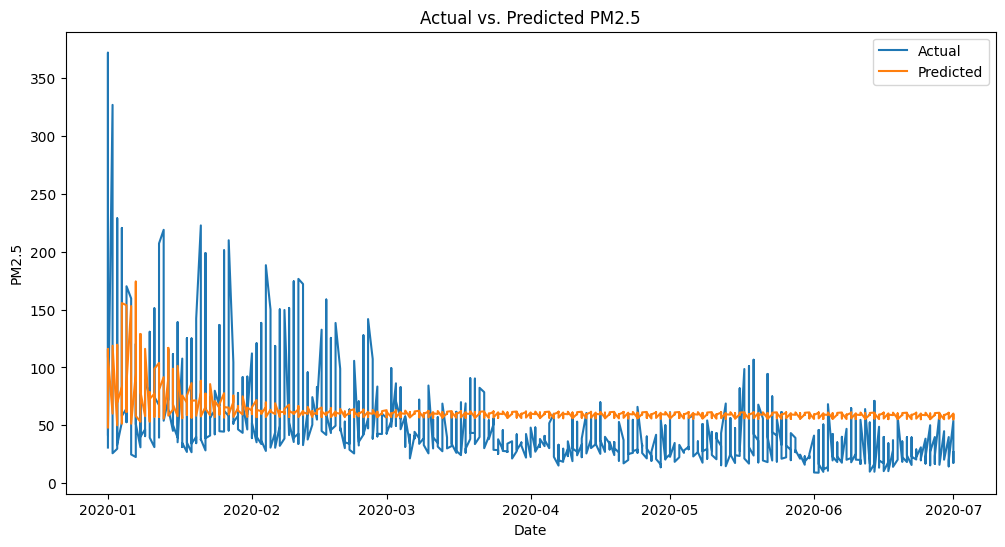

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

# Sort the DataFrame by the 'Date' column in ascending order
df.sort_values(by='Date', inplace=True)

# Perform a time-based train-test split
split_date = '2020-01-01'  # Choose a date to split the data
train_df = df[df['Date'] < split_date]
test_df = df[df['Date'] >= split_date]

# Create the SARIMA model and fit it to the training data
p, d, q = 1, 1, 1  # Order of non-seasonal components
P, D, Q, S = 5, 1, 1, 7  # Order of seasonal components (weekly seasonality assumed)
model = SARIMAX(train_df['PM2.5'], order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

# Make in-sample predictions on the training data
train_predictions = results.get_prediction(start=train_df.index[0], end=train_df.index[-1])
train_pred_mean = train_predictions.predicted_mean

# Make out-of-sample predictions on the test data
test_predictions = results.get_forecast(steps=len(test_df))
y_pred = test_predictions.predicted_mean

# Evaluate the model's performance
mape = mean_absolute_percentage_error(test_df['PM2.5'], y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Optionally, you can visualize the actual vs. predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_df['Date'], test_df['PM2.5'], label='Actual')
plt.plot(test_df['Date'], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Actual vs. Predicted PM2.5')
plt.legend()
plt.show()


Here the **Mean Absolute Percentage Error (MAPE)**: 1.0121422084492264 is quite good for extimation result.

